# DataSet de Pingüinos: Entregable # 1.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Cargar el dataset
df = sns.load_dataset('penguins')
def Pascal(Str):
    return Str.strip().replace('_',' ')

df = df.rename(mapper=Pascal,axis='columns') # reescribir las columnas.
df.head()

,species,island,bill length mm,bill depth mm,flipper length mm,body mass g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Primera aproximación a los datos de forma general y su limpieza.

**1)** ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Qué caracteristicas de los pingüinos se dan para cada especie?

El número y tipo de especies diferentes de pingüinos se consigue fácilmente aplicando la función .unique() a la columna species.

In [2]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

El número de especies diferentes es $3$ y son Adelie, Chinstrap y Gentoo.  

La isla y el sexo no son caracteristicas específicas de cada especie, de manera que si agrupamos por especie, isla y sexo, tendremos que las columnas serán precisamente las caracteristicas específicas de cada una de las especies.

In [3]:
df_ = df.groupby(['species', 'island','sex']).count()
df_

bill length mm  bill depth mm  flipper length mm  \
species   island    sex                                                        
Adelie    Biscoe    Female              22             22                 22   
                    Male                22             22                 22   
          Dream     Female              27             27                 27   
                    Male                28             28                 28   
          Torgersen Female              24             24                 24   
                    Male                23             23                 23   
Chinstrap Dream     Female              34             34                 34   
                    Male                34             34                 34   
Gentoo    Biscoe    Female              58             58                 58   
                    Male                61             61                 61   

                            body mass g  
species   island    sex                  
Adelie    Biscoe    Female           22  
                    Male             22  
          Dream     Female           27  
                    Male             28  
          Torgersen Female           24  
                    Male             23  
Chinstrap Dream     Female           34  
                    Male             34  
Gentoo    Biscoe    Female           58  
                    Male             61

Tenemos entonces cuatro caracteristicas para cada especie de pingüinos, las cuales son: longitud del pico en milímetros, profundidad del pico en milímetros, longitud de las aletas en milímetros y masas corporal en gramos.

**2)** ¿Hay valores faltantes en las variables? Determine una estrategia de limpieza y apliquela.

La tabla original contiene algunas entradas con valores nulos; los eliminamos con la rutina .dropna() y reestablecemos los indices.

In [4]:
df = df.dropna()
df = df.reset_index(drop=True) # los anteriores indices no son agregados como nuevas columnas.
df

,species,island,bill length mm,bill depth mm,flipper length mm,body mass g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**3)** ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?

Aplicando un groupby en 'island', seguido de un conteo nos dará el número de pingüinos por especie:

In [5]:
df.groupby(['island']).count()

,species,bill length mm,bill depth mm,flipper length mm,body mass g,sex
island,,,,,,
Biscoe,163,163,163,163,163,163
Dream,123,123,123,123,123,123
Torgersen,47,47,47,47,47,47


In [6]:
x = 123/163
y = 47/163
x,y

(0.754601226993865, 0.2883435582822086)

La isla con mayor número de pingüinos según el dataset es Biscoe; la isla de Dream tiene aproximadamente el $75$% de la cantidad presente en Biscoe, y la isla de Torgersen un $29$%, de manera que podemos decir que hay un desbalance en el número de pingüinos por isla.

**4)** Repita la pregunta anterior observando las especies.

In [7]:
df.groupby(['island','species']).count()

bill length mm  bill depth mm  flipper length mm  \
island    species                                                       
Biscoe    Adelie                 44             44                 44   
          Gentoo                119            119                119   
Dream     Adelie                 55             55                 55   
          Chinstrap              68             68                 68   
Torgersen Adelie                 47             47                 47   

                     body mass g  sex  
island    species                      
Biscoe    Adelie              44   44  
          Gentoo             119  119  
Dream     Adelie              55   55  
          Chinstrap           68   68  
Torgersen Adelie              47   47

Observando las especies notamos que la especie con más presencia en Biscoe es Gentoo, la cual solo se encuentra en este lugar. Por otro lado, la especie Chinstrap solo se encuentra en la isla Dream; pero la especie Adelie, que se encuentra en todas las islas, no presenta una diferencia significativa en función de la isla; en este sentido, no hay un desbalance en el número de pingüinos por isla.

<!--  -->

### Tendencias y visualización de las variables.

**5)** ¿Cuál es la longitud media y la desviación estandar del tamaño del pico de los pingüinos por especie?

tomamos solo las columnas 'species' y 'bill length  mm' y las agrupamos por especie; luego de esto se calcula la media y desviación estandar.

In [8]:
df[['species','bill length mm']].groupby('species').mean()

,bill length mm
species,
Adelie,38.823973
Chinstrap,48.833824
Gentoo,47.568067


In [9]:
df[['species','bill length mm']].groupby('species').std()

,bill length mm
species,
Adelie,2.662597
Chinstrap,3.339256
Gentoo,3.106116


Para las longitudes del pico de las diferentes especies en el DataSet tenemos que:

* Adelie: $38.8 \space \pm 2.7$ mm
* Chinstrap: $48.8 \space \pm 3.3$ mm
* Gentoo: $47.6 \space \pm 3.1$ mm


**6)** ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

Debemos hacer uso de la condición del valor máximo como un filtro para el DataFrame así:

In [9]:
lMax = df['bill length mm'].max()  # el pico más largo.
df[df['bill length mm'] == lMax]

,species,island,bill length mm,bill depth mm,flipper length mm,body mass g,sex
246,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


El pingüino con el pico más largo es de la especie Gentoo, está en la isla Biscoe, es macho y su pico tiene una longitud de $59.6$ mm.

**7)** ¿Como es la distribución de la masa corporal entre las especies de pingüinos?

Si queremos ver la distribución de masa corporal de manera comparativa entre especies, utilizamos el paquete de 'seaborn' para hacer un gráfico con histogramas de esta cantidad en función de la especie.

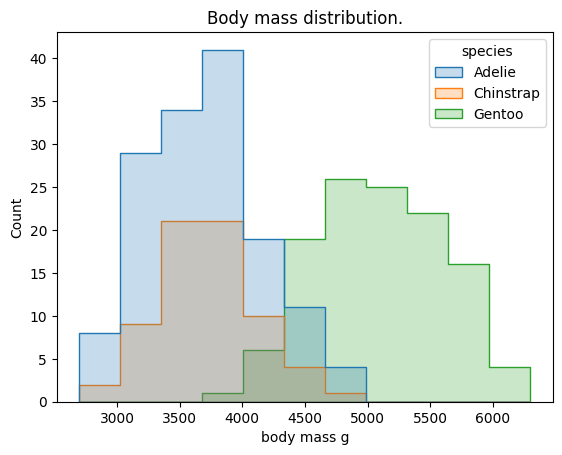

In [19]:
sns.histplot(data=df, x='body mass g', hue='species',element='step')
plt.title('Body mass distribution.')
plt.show()

En el gráfico vemos entonces las distribuciones de masa corporal para cada especie de pingüinos. Las especies Adelie y Chinstrap parecen tener una distribución de masa que sigue la distribución de Poisson, mientras que para la especie Gentoo, la distribución se asemeja más a una tipo Beta.

**8)** Describa la distribución con ayuda de la media y la desviación estandar.

Una buena manera de describir las distribuciones haciedo uso de la media y la desviación estandar es por medio de un gráfico de tipo boxplot.

<Axes: xlabel='body mass g', ylabel='species'>

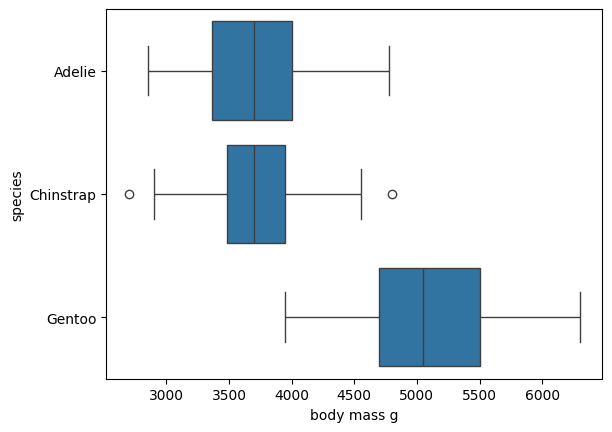

In [11]:
sns.boxplot(data=df,y='species',x='body mass g')

In [12]:
print('Media.\n\n',
      df[['species','body mass g']].groupby('species').mean())
print('\n========================\n')
print('Desviación estandar.\n\n',
      df[['species','body mass g']].groupby('species').std())

Media.

            body mass g
species               
Adelie     3706.164384
Chinstrap  3733.088235
Gentoo     5092.436975


Desviación estandar.

            body mass g
species               
Adelie      458.620135
Chinstrap   384.335081
Gentoo      501.476154


Notamos entonces que las especies Adelie y Chinstrap tienen una media de la distribución de masa corporal muy similar, sin embargo las dispersiones asociadas son considerablemente diferentes, siendo mayor la de la especie Adelie. vemos además que de todas las especies, Gentoo es la que presenta una mayor dispersión y por la forma de la distribución, es de esperarse que tenga un valor de Skewness negativo; para las distribuciones de las otras dos especies el Skewness será ligeramente positivo.

**9)** ¿Cuál es la diferencia en masa corporal promedio y desviación estandar entre machos y hembras?

In [13]:
df_Male = df[df['sex'] == 'Male']
df_Female = df[df['sex'] == 'Female']

#  arreglos con DF's de media y std por género.
Female = [df_Female[['species','body mass g']].groupby('species').mean(),
       df_Female[['species','body mass g']].groupby('species').std()]
Male = [df_Male[['species','body mass g']].groupby('species').mean(),
       df_Male[['species','body mass g']].groupby('species').std()]

In [14]:
print('Media.\n\n',Male[0] - Female[0])
print('\n========================\n')

# propagación de error.
print('Desviación estandar.\n\n',np.sqrt(Male[1]**2 + Female[1]**2))

Media.

            body mass g
species               
Adelie      674.657534
Chinstrap   411.764706
Gentoo      805.094686


Desviación estandar.

            body mass g
species               
Adelie      439.139947
Chinstrap   461.041263
Gentoo      421.134944


El anterior resultado nos muestra entonces la diferencia en masa corporal media entre machos y hembras por especie de pingüinos y su correspondiente desviación estandar.

**10)** ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?

In [21]:
df[['species','flipper length mm']].groupby('species').mean()

,flipper length mm
species,
Adelie,190.102740
Chinstrap,195.823529
Gentoo,217.235294


In [22]:
df[['species','flipper length mm']].groupby('species').std()

,flipper length mm
species,
Adelie,6.521825
Chinstrap,7.131894
Gentoo,6.585431


Las anteriores agrupaciones corresponden a la media y desviación estándar de la longitud de la aleta de los pingüinos por especie.

**11)** ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [34]:
flipper_min = df['flipper length mm'].min()
flipper_max = df['flipper length mm'].max()

pd.concat([df[df['flipper length mm'] == flipper_min] , df[df['flipper length mm'] == flipper_max]],axis=0)

,species,island,bill length mm,bill depth mm,flipper length mm,body mass g,sex
23,Adelie,Biscoe,37.9,18.6,172.0,3150.0,Female
276,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,Male


La anterior tabla nos muestra la información de los pingüinos con la menor y mayor longitud de la aleta respectivamente; de manera que la longitud mínima de aleta es $172$ mm y pertenece a una hembra de la especie Adelie; por otro lado, la longitud máxima de aleta es $231$ mm y pertenece a un pingüino macho de la especie Gentoo.

**12)** ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

Debido a que se quiere comparar la longitud del pico entre las diferentes especies por isla, a continuación mostramos una agrupación primero por isla y luego por especie de la longitud media del pico de los pongüinos.  
* En la isla Biscoe, la varación media del pico entre las especies Adelie y Gentoo es de  $8.6$ mm.  
* En la isla Dream, la variación media del pico entre las especies Adelie y Chinstrap es de $10.3$ mm.  
* En la isla Torgersen solo se cuenta con la especie Adelie.

In [37]:
df[['species', 'island','bill length mm']].groupby(['island','species']).mean()

bill length mm
island    species                  
Biscoe    Adelie          38.975000
          Gentoo          47.568067
Dream     Adelie          38.520000
          Chinstrap       48.833824
Torgersen Adelie          39.038298

**13)** ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

Usando los datos obtenidos de la anterior agrupación tenemos que la isla que presenta una mayor variación en la longitud del pico es Dream.

<!--  -->

### Relación entre caracteristicas de los pingüinos.

**14)** ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

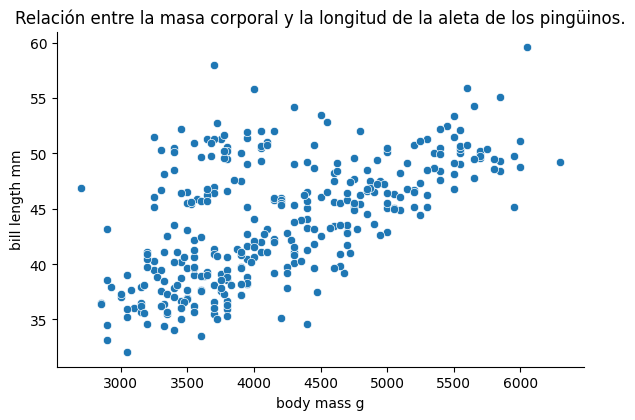

In [102]:
sns.pairplot(data=df,x_vars='body mass g',y_vars='bill length mm',height=4,aspect=1.5)
plt.title('Relación entre la masa corporal y la longitud del pico de los pingüinos.')
plt.show()

En la figura podemos visualizar una leve correlación positiva entre la masa corporal y la longitud del pico de los pingüinos sin tener en cuenta su especie.  
<!--  -->
Si tenemos en cuenta la especie, el gráfico queda de la siguiente manera:

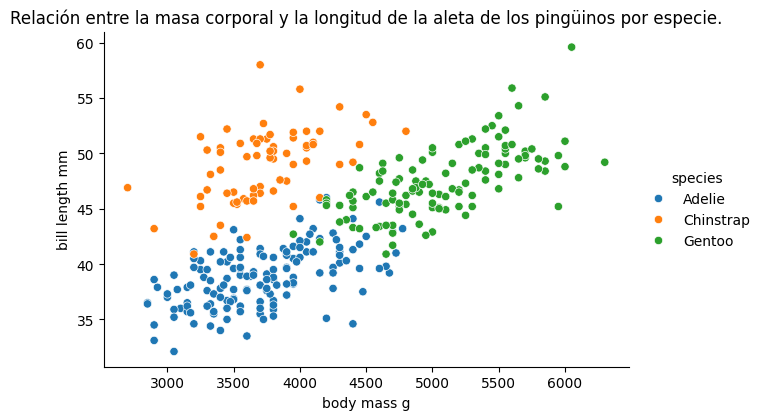

In [101]:
sns.pairplot(data=df,hue='species',x_vars='body mass g',y_vars='bill length mm',height=4,aspect=1.5)
plt.title('Relación entre la masa corporal y la longitud del pico de los pingüinos por especie.')
plt.show()

En el cual vemos que se sigue satisfaciendo la correlación, siendo más marcada para las especies Adelie y Gentoo.

**15)** ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

In [66]:
import scipy.stats as stats

# arrays con las masas corporales para cada especie.
body_mass_A = np.array(df[df['species'] == 'Adelie']['body mass g'])
body_mass_C = np.array(df[df['species'] == 'Chinstrap']['body mass g'])
body_mass_G = np.array(df[df['species'] == 'Gentoo']['body mass g'])

# arrays con las long del pico para cada especie.
bill_length_A = np.array(df[df['species'] == 'Adelie']['bill length mm'])
bill_length_C = np.array(df[df['species'] == 'Chinstrap']['bill length mm'])
bill_length_G = np.array(df[df['species'] == 'Gentoo']['bill length mm'])

# cuantificar la correlación para cada especie.
corr_A, pvA = stats.pearsonr(body_mass_A,bill_length_A)
corr_C, pvC = stats.pearsonr(body_mass_C,bill_length_C)
corr_G, pvG = stats.pearsonr(body_mass_G,bill_length_G)

In [88]:
print(f'''
Los coeficientes de correlación de Pearson y sus correspondientes p-value entre
la masa corporal y la longitud del pico por especie de pingüino son:

* Adelie:    Coef = {corr_A:.2f} ; p-value = {pvA}
* Chinstrap: Coef = {corr_C:.2f} ; p-value = {pvC}
* Gentoo:    Coef = {corr_G:.2f} ; p-value = {pvG}
''')



Los coeficientes de correlación de Pearson y sus correspondientes p-value entre
la masa corporal y la longitud del pico por especie de pingüino son:

* Adelie:    Coef = 0.54 ; p-value = 1.241917971306323e-12
* Chinstrap: Coef = 0.51 ; p-value = 7.480491991584471e-06
* Gentoo:    Coef = 0.67 ; p-value = 1.2624180880764288e-16



El anterior resultado indica que la correlación entre la masa corporal y la longitud del pico es significativa entre las diferentes especies.

**16)** ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

Haciendo un boxplot de la longitud de la aleta de los pingüinos categorizado por sexo para cada especie encontramos que, para cada una, la longitud media parece ser mayor para los machos que para las hembras:

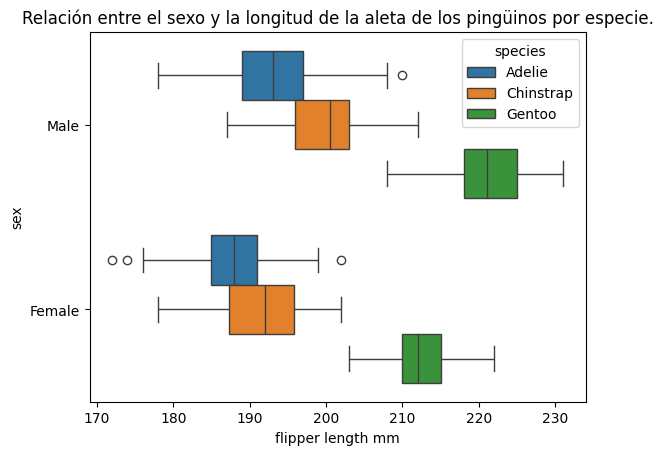

In [99]:
sns.boxplot(data=df,x='flipper length mm',y='sex',hue='species')
plt.title('Relación entre el sexo y la longitud de la aleta de los pingüinos por especie.')
plt.show()

### Test de hipótesis.

**17)** Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

Dado que ya tenemos los coeficientes de correlación de Pearson entre la masa y la longitud del pico de los pingüinos, calculemos el estimador y los correspondientes intervalos de confianza asociados a un nivel de significancia del $1$%; siendo nuestra hipótesis nula la no existencia de correlación entre la masa y la longitud del pico de los pingüinos.

In [122]:
# número de pingüinos de cada especie en el data set.
nA = len(df[df['species'] == 'Adelie'])
nC = len(df[df['species'] == 'Chinstrap'])
nG = len(df[df['species'] == 'Gentoo'])

# estimadores para cada especie.
tA = corr_A*np.sqrt(nA - 2)/np.sqrt(1 - corr_A**2)
tC = corr_C*np.sqrt(nC - 2)/np.sqrt(1 - corr_C**2)
tG = corr_G*np.sqrt(nG - 2)/np.sqrt(1 - corr_G**2)

# intervalos para cada especie.
iA = stats.t.interval(0.99, nA - 2, loc=0, scale=1)
iC = stats.t.interval(0.99, nC - 2, loc=0, scale=1)
iG = stats.t.interval(0.99, nG - 2, loc=0, scale=1)

In [124]:
print(f'''Los estimadores e intervalos para las diferentes especies son:\n
* Adelie:    t = {tA:.3f}  ; [{iA[0]:.3f} , {iA[1]:.3f}]
* Chinstrap: t = {tC:.3f}  ; [{iC[0]:.3f} , {iC[1]:.3f}]
* Gentoo:    t = {tG:.3f}  ; [{iG[0]:.3f} , {iG[1]:.3f}]
''')

Los estimadores e intervalos para las diferentes especies son:

* Adelie:    t = 7.786  ; [-2.610 , 2.610]
* Chinstrap: t = 4.863  ; [-2.652 , 2.652]
* Gentoo:    t = 9.676  ; [-2.619 , 2.619]



Para las tres especies, el estimador está fuera del intervalo, de manera que la hipótesis nula se rechaza y decimos entonces que para un nivel de significancia del $1$% existe una correlación entre la masa corporal y la longitud del pico de los pingüinos para todas las especies consideradas en el dataset.

<!--  -->
### *Juan José Pérez Avendaño*